In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
workingfolder = "/Users/esa2/Code/Personal/DataScience/DataScience/Fifa18/"
datafile = "data2.csv"
datafilepath = workingfolder+datafile
%matplotlib inline
df = pd.read_csv(datafilepath)
#df.head(7)

In [ ]:
#del df[''] #deletes the column GKReflexes
#df.head()
plt.figure(figsize=(15,32))

sns.countplot(y = df.Nationality,palette="Set2") #Plot all the nations on Y Axis


In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=df) 

In [ ]:
#weights
a = 0.5
b = 1
c = 2
d = 3

#GoalKeeping Characterstics
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Sprint_Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Sprint_Speed + a*df.Short_Passing + a*df.Long_Passing + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)

In [ ]:

plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

In [ ]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")

Text(0, 0.5, 'Player Potential Growth')

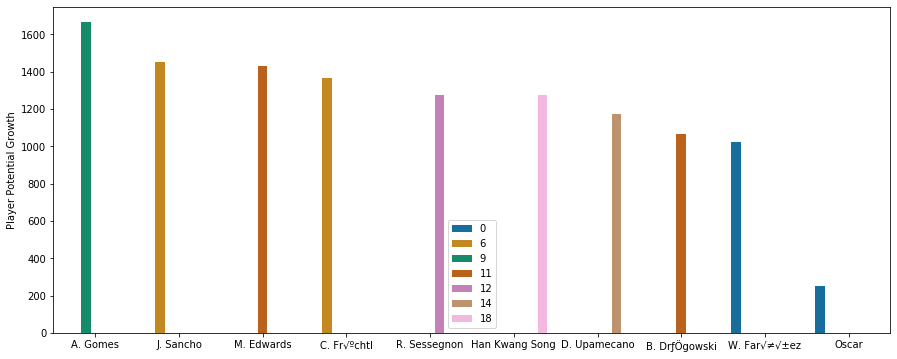

In [107]:
df['Player_Potential'] = ((df.Potential-df.Overall)*df.Overall)

plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
ssd = df[df['Overall'] > 60]
ssd = ssd[ssd['Potential'] > 85]
ssd = ssd[ssd['Wage_K'] < 20]
ssd = ssd[ssd['Value_K'] < 5000]
sd = ssd.sort_values('Player_Potential', ascending=False)[:20]

x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['Player_Potential']))
y2 = np.array(list(sd['Wage_K']))
sns.barplot(x1, y1, y2, palette= "colorblind")
plt.ylabel("Player Potential Growth")


In [108]:
sd.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Player_Potential
11397,11397,A. Gomes,16,https://cdn.sofifa.org/48/18/players/240507.png,England,https://cdn.sofifa.org/flags/14.png,64,90,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,33.0,58.0,43.0,62.0,63.0,59.0,64.0,46.0,59.0,1664
12275,12275,J. Sancho,17,https://cdn.sofifa.org/48/18/players/233049.png,England,https://cdn.sofifa.org/flags/14.png,63,86,Borussia Dortmund,https://cdn.sofifa.org/24/18/teams/22.png,...,39.0,56.0,45.0,62.0,61.0,58.0,63.0,47.0,58.0,1449
10260,10260,M. Edwards,18,https://cdn.sofifa.org/48/18/players/235619.png,England,https://cdn.sofifa.org/flags/14.png,65,87,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,...,38.0,59.0,47.0,64.0,64.0,59.0,65.0,51.0,59.0,1430
9888,9888,C. Fr√ºchtl,17,https://cdn.sofifa.org/48/18/players/235266.png,Germany,https://cdn.sofifa.org/flags/21.png,65,86,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1365
8147,8147,R. Sessegnon,17,https://cdn.sofifa.org/48/18/players/235883.png,England,https://cdn.sofifa.org/flags/14.png,67,86,Fulham,https://cdn.sofifa.org/24/18/teams/144.png,...,61.0,64.0,63.0,66.0,67.0,64.0,67.0,66.0,64.0,1273
8342,8342,Han Kwang Song,18,https://cdn.sofifa.org/48/18/players/238232.png,Korea DPR,https://cdn.sofifa.org/flags/166.png,67,86,Perugia,https://cdn.sofifa.org/24/18/teams/199.png,...,38.0,55.0,41.0,66.0,63.0,66.0,65.0,46.0,66.0,1273
6398,6398,D. Upamecano,18,https://cdn.sofifa.org/48/18/players/229558.png,France,https://cdn.sofifa.org/flags/18.png,69,86,RB Leipzig,https://cdn.sofifa.org/24/18/teams/112172.png,...,68.0,56.0,64.0,52.0,55.0,49.0,53.0,63.0,49.0,1173
4683,4683,B. DrƒÖgowski,19,https://cdn.sofifa.org/48/18/players/215502.png,Poland,https://cdn.sofifa.org/flags/37.png,71,86,Fiorentina,https://cdn.sofifa.org/24/18/teams/110374.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1065
2973,2973,W. Far√≠√±ez,19,https://cdn.sofifa.org/48/18/players/228736.png,Venezuela,https://cdn.sofifa.org/flags/61.png,73,87,NaN,https://cdn.sofifa.org/flags/61.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022
162,162,Oscar,25,https://cdn.sofifa.org/48/18/players/188152.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,86,NaN,https://cdn.sofifa.org/flags/54.png,...,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0,249
